Para comenzar con el EDA de este proyecto, se importan las lebrerías que se consideran convenientes.

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
from pycoingecko import CoinGeckoAPI

Luego se trae los datos que se van a utilizar.

Se crea una funcion capaz de traer el resultado del get que elijamos.

In [196]:
def extraccion_de_datos(link, nombre):
    response = requests.get(link)
    if response.status_code == 200:
        data = response.json()
        
        with open(nombre, mode='w', newline='', encoding='utf-8') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerow(data[0].keys())
            for item in data:
                csv_writer.writerow(item.values())
                
        print(f'Los datos han sido escritos en {nombre}')
    else:
        print("La solicitud no fue exitosa.")

Ahora, se trae el resultado del get /coins/marquet, en el que se puede ver todos los datos relacionados con el precio, la capitalización de mercado, el volumen y el mercado de las monedas.

In [197]:
extraccion_de_datos('https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=100&page=1&sparkline=false&locale=en', 'datos_mercado.csv')

Los datos han sido escritos en datos_mercado.csv


instanciamos el csv resultante en una variable para tener acceso al mismo y poder manipularlo.

In [198]:
datos_mercado = pd.read_csv('datos_mercado.csv')
datos_mercado

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29113.000000,566534070222,1,6.114011e+11,1.340291e+10,29408.000000,...,2.100000e+07,2.100000e+07,69045.00,-57.88087,2021-11-10T14:24:11.849Z,6.781000e+01,42786.72436,2013-07-06T00:00:00.000Z,NaN,2023-08-16T09:57:22.653Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1821.530000,218791302644,2,2.187913e+11,6.331698e+09,1842.750000,...,1.201391e+08,NaN,4878.26,-62.68238,2021-11-10T14:24:19.604Z,4.329790e-01,420347.94812,2015-10-20T00:00:00.000Z,"{'times': 82.65088223204627, 'currency': 'btc'...",2023-08-16T09:57:21.071Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999111,83043591166,3,8.304359e+10,1.888490e+10,1.001000,...,8.318200e+10,NaN,1.32,-24.53847,2018-07-24T00:00:00.000Z,5.725210e-01,74.39149,2015-03-02T00:00:00.000Z,NaN,2023-08-16T09:55:00.522Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,233.550000,35947506251,4,4.672872e+10,4.816825e+08,239.330000,...,1.538562e+08,2.000000e+08,686.31,-65.95032,2021-05-10T07:24:17.097Z,3.981770e-02,586787.77372,2017-10-19T00:00:00.000Z,NaN,2023-08-16T09:57:28.335Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.596365,31541612720,5,5.975229e+10,1.697205e+09,0.627297,...,9.998852e+10,1.000000e+11,3.40,-82.41811,2018-01-07T00:00:00.000Z,2.686210e-03,22143.69701,2014-05-22T00:00:00.000Z,NaN,2023-08-16T09:57:22.638Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,casper-network,cspr,Casper Network,https://assets.coingecko.com/coins/images/1527...,0.037256,418412855,96,4.440383e+08,4.484520e+06,0.038403,...,1.193933e+10,NaN,1.33,-97.19241,2021-05-12T00:00:00.000Z,2.241297e-02,66.03366,2022-06-18T20:14:44.694Z,NaN,2023-08-16T09:57:22.712Z
96,terra-luna,lunc,Terra Luna Classic,https://assets.coingecko.com/coins/images/8284...,0.000069,404220173,97,4.752215e+08,4.840170e+07,0.000078,...,6.838754e+12,NaN,119.18,-99.99994,2022-04-05T12:24:58.854Z,9.999670e-07,6827.73193,2022-05-13T02:34:40.340Z,NaN,2023-08-16T09:57:27.304Z
97,huobi-token,ht,Huobi,https://assets.coingecko.com/coins/images/2822...,2.530000,403808638,98,5.093013e+08,6.649935e+06,2.590000,...,2.010500e+08,2.010500e+08,39.66,-93.60929,2021-05-12T14:42:21.586Z,3.138000e-01,707.71310,2023-03-10T05:05:00+08:00,"{'times': 1.5598161574591, 'currency': 'usd', ...",2023-08-16T09:57:19.714Z
98,sui,sui,Sui,https://assets.coingecko.com/coins/images/2637...,0.554809,400806224,99,5.542411e+09,1.094844e+08,0.590198,...,1.000000e+10,1.000000e+10,2.16,-74.41513,2023-05-03T12:00:26.430Z,5.506920e-01,0.46937,2023-08-15T19:34:59.901Z,NaN,2023-08-16T09:57:17.140Z


Entonces en base a esta lista, elegimos las 12 monedas que mayor capitalización de mercado tengan, ya que eston nos da un indicativo de cuales son las monedas mas fuertes, es decír las que tienen menos riesgo de caída y generan mayor confianza.

In [199]:
top_12_mercado = datos_mercado.nlargest(12, 'market_cap')
top_12_mercado

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29113.000000,566534070222,1,6.114011e+11,1.340291e+10,29408.000000,...,2.100000e+07,2.100000e+07,69045.000000,-57.88087,2021-11-10T14:24:11.849Z,67.810000,42786.72436,2013-07-06T00:00:00.000Z,NaN,2023-08-16T09:57:22.653Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1821.530000,218791302644,2,2.187913e+11,6.331698e+09,1842.750000,...,1.201391e+08,NaN,4878.260000,-62.68238,2021-11-10T14:24:19.604Z,0.432979,420347.94812,2015-10-20T00:00:00.000Z,"{'times': 82.65088223204627, 'currency': 'btc'...",2023-08-16T09:57:21.071Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999111,83043591166,3,8.304359e+10,1.888490e+10,1.001000,...,8.318200e+10,NaN,1.320000,-24.53847,2018-07-24T00:00:00.000Z,0.572521,74.39149,2015-03-02T00:00:00.000Z,NaN,2023-08-16T09:55:00.522Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,233.550000,35947506251,4,4.672872e+10,4.816825e+08,239.330000,...,1.538562e+08,2.000000e+08,686.310000,-65.95032,2021-05-10T07:24:17.097Z,0.039818,586787.77372,2017-10-19T00:00:00.000Z,NaN,2023-08-16T09:57:28.335Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.596365,31541612720,5,5.975229e+10,1.697205e+09,0.627297,...,9.998852e+10,1.000000e+11,3.400000,-82.41811,2018-01-07T00:00:00.000Z,0.002686,22143.69701,2014-05-22T00:00:00.000Z,NaN,2023-08-16T09:57:22.638Z
5,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.999570,26028494416,6,2.602850e+10,3.531726e+09,1.001000,...,2.603100e+10,NaN,1.170000,-14.68244,2019-05-08T00:40:28.300Z,0.877647,14.00081,2023-03-11T08:02:13.981Z,NaN,2023-08-16T09:57:21.225Z
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1820.300000,14804119585,7,1.480553e+10,2.370873e+07,1841.500000,...,8.135664e+06,8.135664e+06,4829.570000,-62.32703,2021-11-10T14:40:47.256Z,482.900000,276.77716,2020-12-22T04:08:21.854Z,NaN,2023-08-16T09:57:18.064Z
7,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.069894,9844510143,8,9.844515e+09,5.669623e+08,0.074351,...,1.406116e+11,NaN,0.731578,-90.43727,2021-05-08T05:08:23.458Z,0.000087,80401.52014,2015-05-06T00:00:00.000Z,NaN,2023-08-16T09:57:21.000Z
8,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.276567,9698225062,9,1.245313e+10,1.980533e+08,0.289517,...,4.500000e+10,4.500000e+10,3.090000,-91.04722,2021-09-02T06:00:10.474Z,0.019253,1335.45343,2020-03-13T02:22:55.044Z,NaN,2023-08-16T09:57:28.426Z
9,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,23.310000,9477064735,10,1.294898e+10,4.775570e+08,25.010000,...,5.551115e+08,NaN,259.960000,-91.04940,2021-11-06T21:54:35.825Z,0.500801,4546.13603,2020-05-11T19:35:23.449Z,NaN,2023-08-16T09:57:24.286Z


Una vez teniendo esto, realizamos un código para obtener el historico de precios en dolares de estas monedas 

In [200]:
cg = CoinGeckoAPI()

In [201]:
def historial_criptomoneda(id: str, moneda: str, days, kpi: str) -> pd.DataFrame:
    data_moneda = cg.get_coin_market_chart_by_id(id = id, vs_currency = moneda, days = days, interval = 'daily')
    data_kpi = []
    for data in data_moneda[kpi]:
        data_kpi.append(data[1])
    coin_data_df = pd.DataFrame(data={id: data_kpi})
    return coin_data_df

Una vez que tenemos la funcion para realizarlo, extraemos los datos y les correjimos el formato de la fecha

In [202]:
data_bitcoin = historial_criptomoneda('bitcoin', 'usd', '60', 'prices')
total_dates = data_bitcoin.shape[0]
data_bitcoin['fecha'] = pd.date_range(end = pd.Timestamp.today(), periods = total_dates, freq = 'D')
data_bitcoin['fecha'] = data_bitcoin['fecha'].dt.strftime('%Y-%m-%d')
data_bitcoin.head()

,bitcoin,fecha
0,26501.044442,2023-06-17
1,26333.092530,2023-06-18
2,26779.387462,2023-06-19
3,28330.891420,2023-06-20
4,30101.764819,2023-06-21


In [203]:
data_ethereum = historial_criptomoneda('ethereum', 'usd', '60', 'prices')
total_dates_ethereum = data_ethereum.shape[0]
data_ethereum['fecha'] = pd.date_range(end=pd.Timestamp.today(), periods=total_dates_ethereum, freq='D')
data_ethereum['fecha'] = data_ethereum['fecha'].dt.strftime('%Y-%m-%d')
data_ethereum.head()

,ethereum,fecha
0,1726.372810,2023-06-17
1,1719.273162,2023-06-18
2,1734.793103,2023-06-19
3,1790.190441,2023-06-20
4,1892.899572,2023-06-21


In [204]:
data_tether = historial_criptomoneda('tether', 'usd', '60', 'prices')
total_dates_tether = data_tether.shape[0]
data_tether['fecha'] = pd.date_range(end=pd.Timestamp.today(), periods=total_dates_tether, freq='D')
data_tether['fecha'] = data_tether['fecha'].dt.strftime('%Y-%m-%d')
data_tether.head()

,tether,fecha
0,0.998907,2023-06-17
1,0.999607,2023-06-18
2,1.000119,2023-06-19
3,0.999061,2023-06-20
4,1.000841,2023-06-21


In [205]:
data_binancecoin = historial_criptomoneda('binancecoin', 'usd', '60', 'prices')
total_dates_binancecoin = data_binancecoin.shape[0]
data_binancecoin['fecha'] = pd.date_range(end=pd.Timestamp.today(), periods=total_dates_binancecoin, freq='D')
data_binancecoin['fecha'] = data_binancecoin['fecha'].dt.strftime('%Y-%m-%d')
data_binancecoin.head()

,binancecoin,fecha
0,244.426681,2023-06-17
1,244.002668,2023-06-18
2,242.740726,2023-06-19
3,247.322779,2023-06-20
4,249.358236,2023-06-21


In [206]:
data_ripple = historial_criptomoneda('ripple', 'usd', '60', 'prices')
total_dates_ripple = data_ripple.shape[0]
data_ripple['fecha'] = pd.date_range(end=pd.Timestamp.today(), periods=total_dates_ripple, freq='D')
data_ripple['fecha'] = data_ripple['fecha'].dt.strftime('%Y-%m-%d')
data_ripple.head()

,ripple,fecha
0,0.480918,2023-06-17
1,0.488737,2023-06-18
2,0.493941,2023-06-19
3,0.492273,2023-06-20
4,0.500997,2023-06-21


In [207]:
data_usd_coin = historial_criptomoneda('usd-coin', 'usd', '60', 'prices')
total_dates_usd_coin = data_usd_coin.shape[0]
data_usd_coin['fecha'] = pd.date_range(end=pd.Timestamp.today(), periods=total_dates_usd_coin, freq='D')
data_usd_coin['fecha'] = data_usd_coin['fecha'].dt.strftime('%Y-%m-%d')
data_usd_coin.head()

,usd-coin,fecha
0,0.999417,2023-06-17
1,0.999524,2023-06-18
2,1.000327,2023-06-19
3,0.999767,2023-06-20
4,0.999635,2023-06-21


In [208]:
data_staked_ether = historial_criptomoneda('staked-ether', 'usd', '60', 'prices')
total_dates_staked_ether = data_staked_ether.shape[0]
data_staked_ether['fecha'] = pd.date_range(end=pd.Timestamp.today(), periods=total_dates_staked_ether, freq='D')
data_staked_ether['fecha'] = data_staked_ether['fecha'].dt.strftime('%Y-%m-%d')
data_staked_ether.head()

,staked-ether,fecha
0,1725.299740,2023-06-17
1,1717.346227,2023-06-18
2,1732.312209,2023-06-19
3,1790.503351,2023-06-20
4,1892.281391,2023-06-21


In [209]:
data_dogecoin = historial_criptomoneda('dogecoin', 'usd', '60', 'prices')
total_dates_dogecoin = data_dogecoin.shape[0]
data_dogecoin['fecha'] = pd.date_range(end=pd.Timestamp.today(), periods=total_dates_dogecoin, freq='D')
data_dogecoin['fecha'] = data_dogecoin['fecha'].dt.strftime('%Y-%m-%d')
data_dogecoin.head()

,dogecoin,fecha
0,0.062264,2023-06-17
1,0.062345,2023-06-18
2,0.062378,2023-06-19
3,0.062946,2023-06-20
4,0.065827,2023-06-21


In [210]:
data_cardano = historial_criptomoneda('cardano', 'usd', '60', 'prices')
total_dates_cardano = data_cardano.shape[0]
data_cardano['fecha'] = pd.date_range(end=pd.Timestamp.today(), periods=total_dates_cardano, freq='D')
data_cardano['fecha'] = data_cardano['fecha'].dt.strftime('%Y-%m-%d')
data_cardano.head()

,cardano,fecha
0,0.266965,2023-06-17
1,0.261127,2023-06-18
2,0.263035,2023-06-19
3,0.269664,2023-06-20
4,0.287148,2023-06-21


In [211]:
data_solana = historial_criptomoneda('solana', 'usd', '60', 'prices')
total_dates_solana = data_solana.shape[0]
data_solana['fecha'] = pd.date_range(end=pd.Timestamp.today(), periods=total_dates_solana, freq='D')
data_solana['fecha'] = data_solana['fecha'].dt.strftime('%Y-%m-%d')
data_solana.head()

,solana,fecha
0,15.626354,2023-06-17
1,15.434485,2023-06-18
2,16.038762,2023-06-19
3,16.625143,2023-06-20
4,17.263202,2023-06-21


In [212]:
data_tron = historial_criptomoneda('tron', 'usd', '60', 'prices')
total_dates_tron = data_tron.shape[0]
data_tron['fecha'] = pd.date_range(end=pd.Timestamp.today(), periods=total_dates_tron, freq='D')
data_tron['fecha'] = data_tron['fecha'].dt.strftime('%Y-%m-%d')
data_tron.head()

,tron,fecha
0,0.071602,2023-06-17
1,0.070184,2023-06-18
2,0.070180,2023-06-19
3,0.070494,2023-06-20
4,0.072431,2023-06-21


In [213]:
data_polkadot = historial_criptomoneda('polkadot', 'usd', '60', 'prices')
total_dates_polkadot = data_polkadot.shape[0]
data_polkadot['fecha'] = pd.date_range(end=pd.Timestamp.today(), periods=total_dates_polkadot, freq='D')
data_polkadot['fecha'] = data_polkadot['fecha'].dt.strftime('%Y-%m-%d')
data_polkadot.head()

,polkadot,fecha
0,4.520248,2023-06-17
1,4.526426,2023-06-18
2,4.518007,2023-06-19
3,4.665290,2023-06-20
4,4.834416,2023-06-21


Creamos otra en la que podemos unir los datos de cada moneda en un solo dataframe para hacer un analizis completo de la cantidad de datos.

In [214]:
criptos = ['bitcoin', 'ethereum', 'tether', 'binancecoin', 'ripple', 'usd-coin', 'staked-ether', 'dogecoin', 'cardano', 'solana', 'tron', 'polkadot', 'monero']

historico_precios_df = data_bitcoin[['fecha', 'bitcoin']]

for cripto in criptos[1:]:
    data_cripto = globals()[f'data_{cripto.replace("-", "_")}']
    historico_precios_df = historico_precios_df.merge(data_cripto[['fecha', cripto]], on='fecha')

historico_precios_df.head()

,fecha,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,dogecoin,cardano,solana,tron,polkadot,monero
0,2023-06-17,26501.044442,1726.372810,0.998907,244.426681,0.480918,0.999417,1725.299740,0.062264,0.266965,15.626354,0.071602,4.520248,136.351496
1,2023-06-18,26333.092530,1719.273162,0.999607,244.002668,0.488737,0.999524,1717.346227,0.062345,0.261127,15.434485,0.070184,4.526426,137.306643
2,2023-06-19,26779.387462,1734.793103,1.000119,242.740726,0.493941,1.000327,1732.312209,0.062378,0.263035,16.038762,0.070180,4.518007,138.241404
3,2023-06-20,28330.891420,1790.190441,0.999061,247.322779,0.492273,0.999767,1790.503351,0.062946,0.269664,16.625143,0.070494,4.665290,142.227512
4,2023-06-21,30101.764819,1892.899572,1.000841,249.358236,0.500997,0.999635,1892.281391,0.065827,0.287148,17.263202,0.072431,4.834416,145.244624


Una vez teniendo todos los datos juntos, nos fijamos si hay datos duplicados

In [215]:
duplicated_rows = historico_precios_df[historico_precios_df.duplicated()]

# Mostrar las filas duplicadas
if not duplicated_rows.empty:
    print("Filas duplicadas:")
    print(duplicated_rows)
else:
    print("No se encontraron filas duplicadas.")

No se encontraron filas duplicadas.


Al notener datos duplicados, examinamos si tiene datos faltantes

In [216]:
filas_datos_faltantes = historico_precios_df[historico_precios_df.isna().any(axis=1)]

if filas_datos_faltantes.empty:
    print("No hay datos faltantes.")
else:
    print("Filas con datos faltantes:")
    print(filas_datos_faltantes)

No hay datos faltantes.


Al comprobar que no hay datos faltantes se decide avanzar hacia una detección de outliers mediate un diagrama de caja

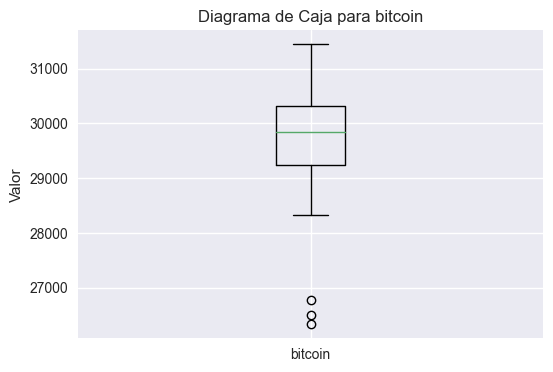

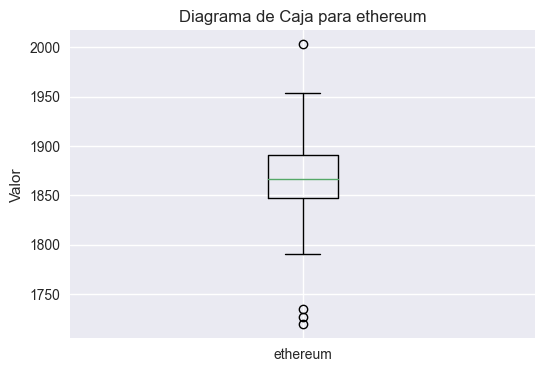

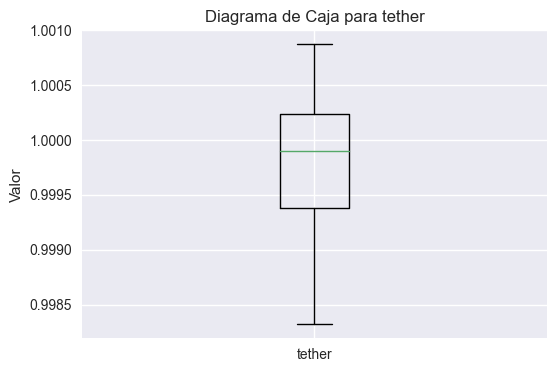

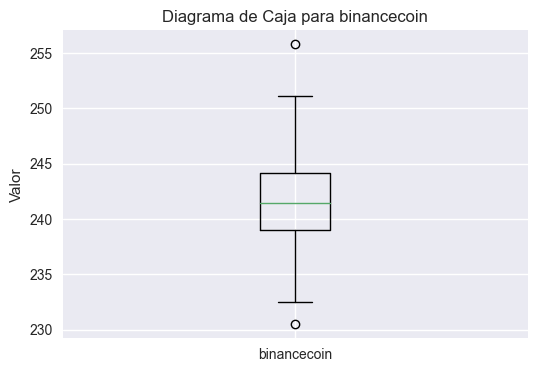

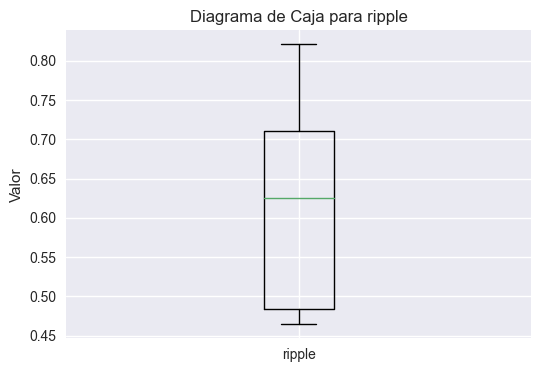

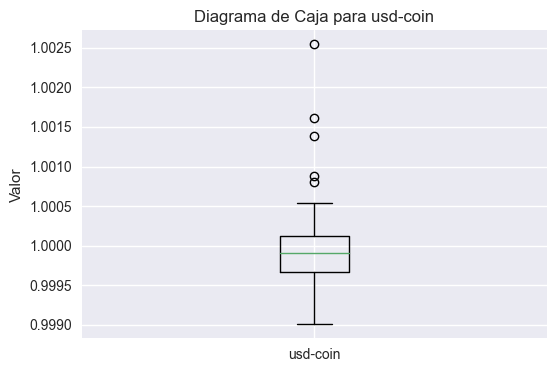

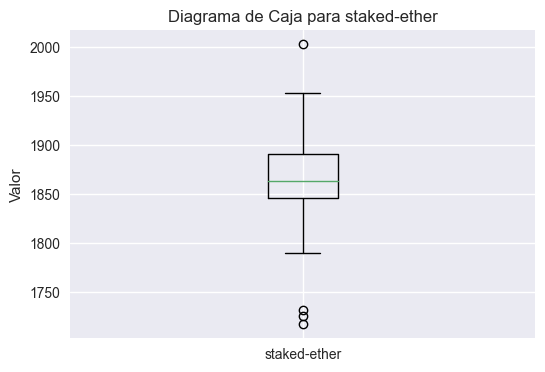

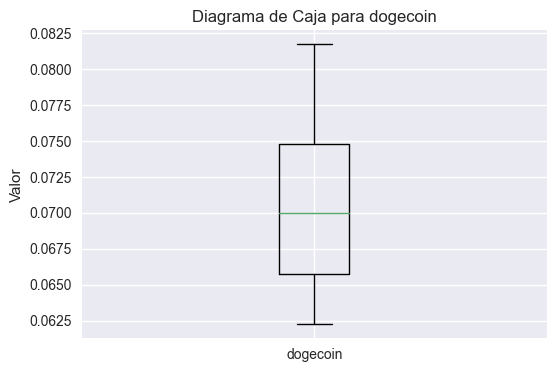

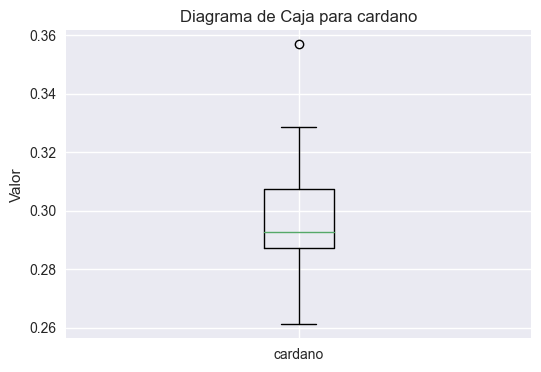

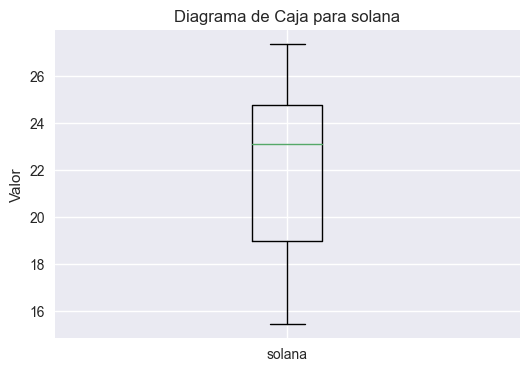

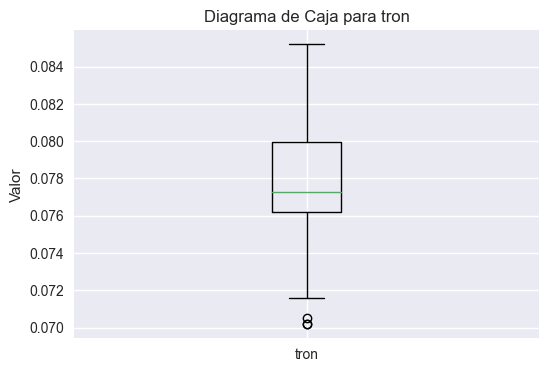

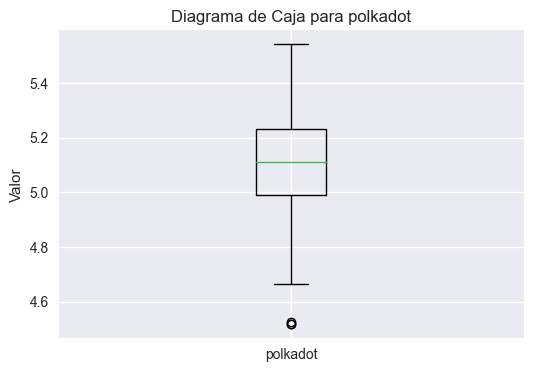

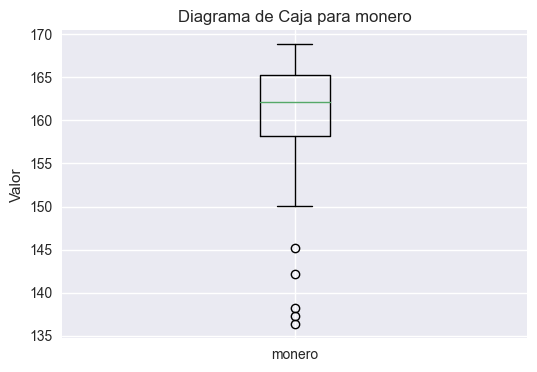

In [217]:
data_boxplot = historico_precios_df.drop(columns=['fecha'])

for column in data_boxplot.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data_boxplot[column])
    plt.title(f'Diagrama de Caja para {column}')
    plt.ylabel('Valor')
    plt.xticks([1], [column])
    plt.show()

A continuación vamos a ver un diagrama de los precios en el tiempo para entender su volatilidad y poder entender como tratar los outliers

C:\Users\I5\AppData\Local\Temp\ipykernel_17476\1094485368.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


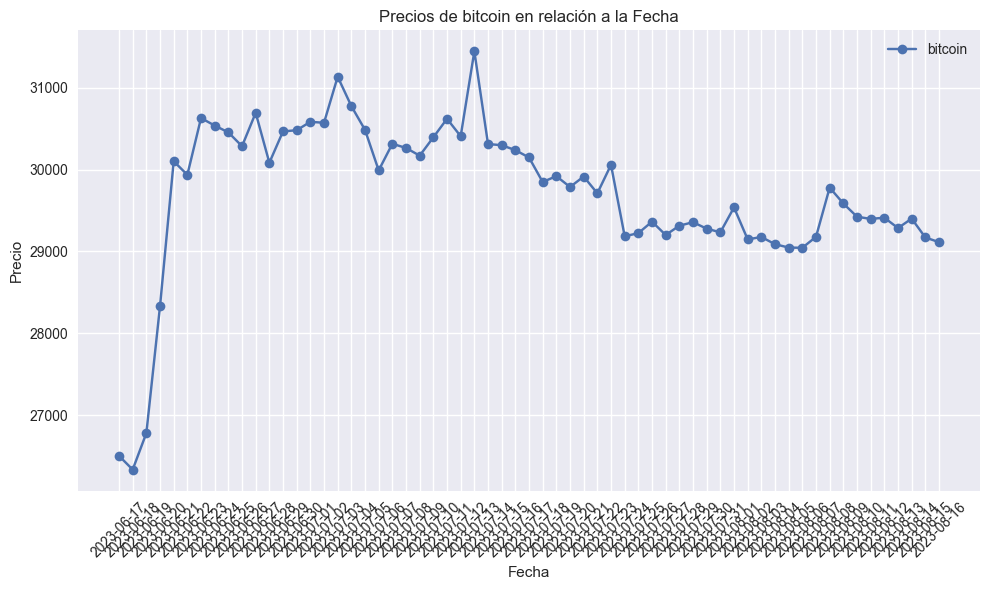

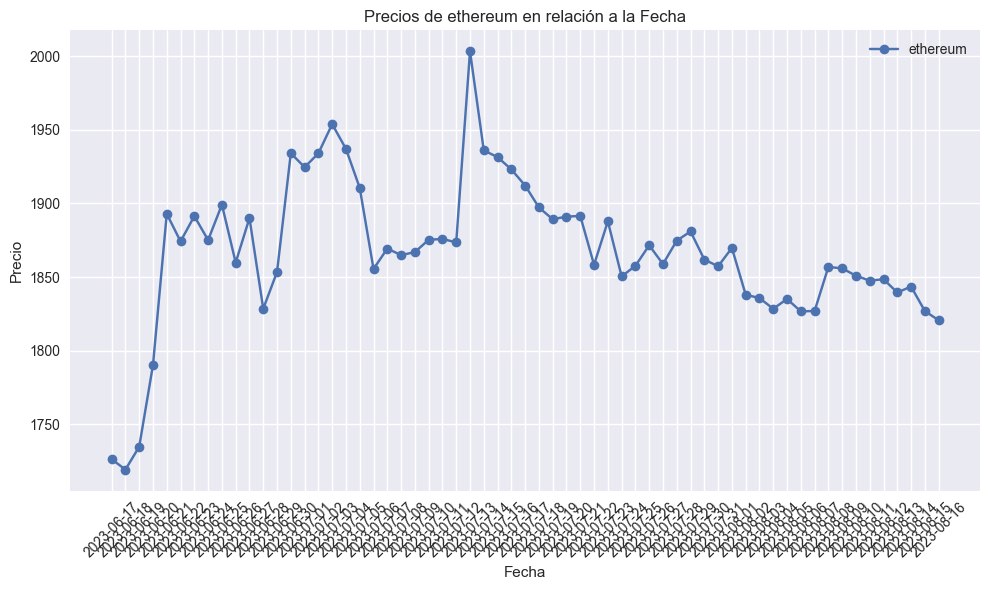

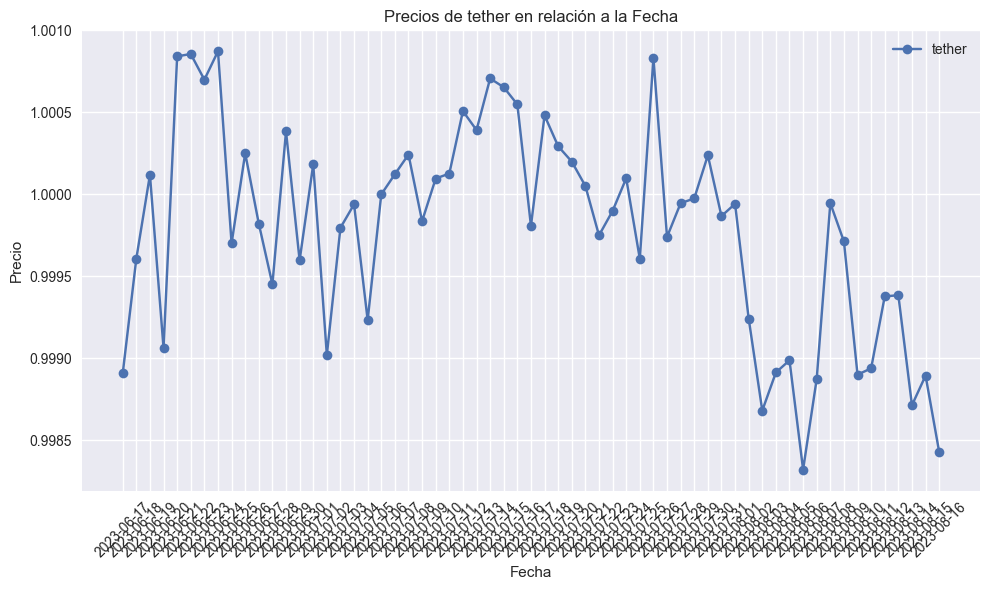

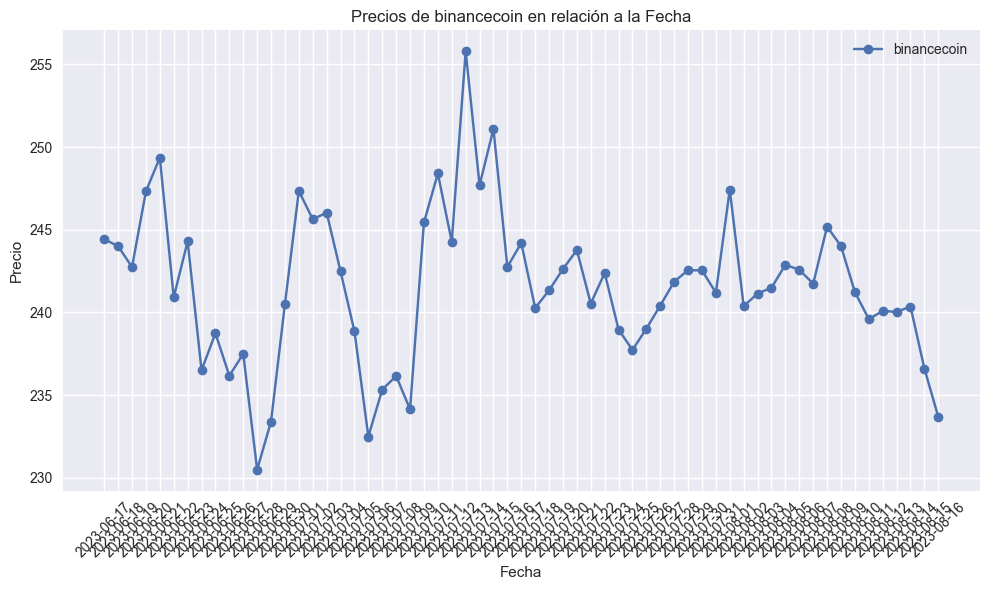

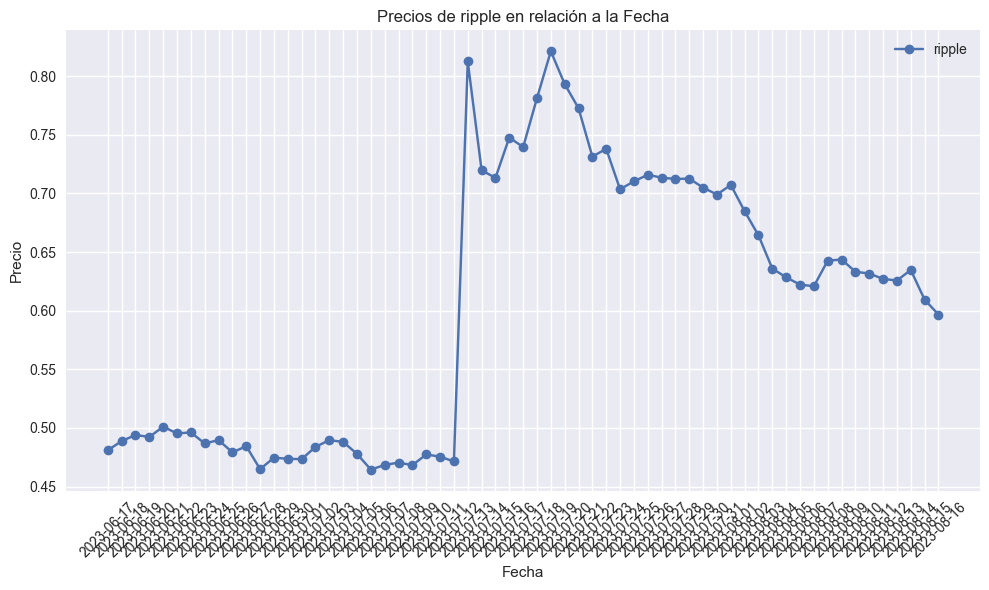

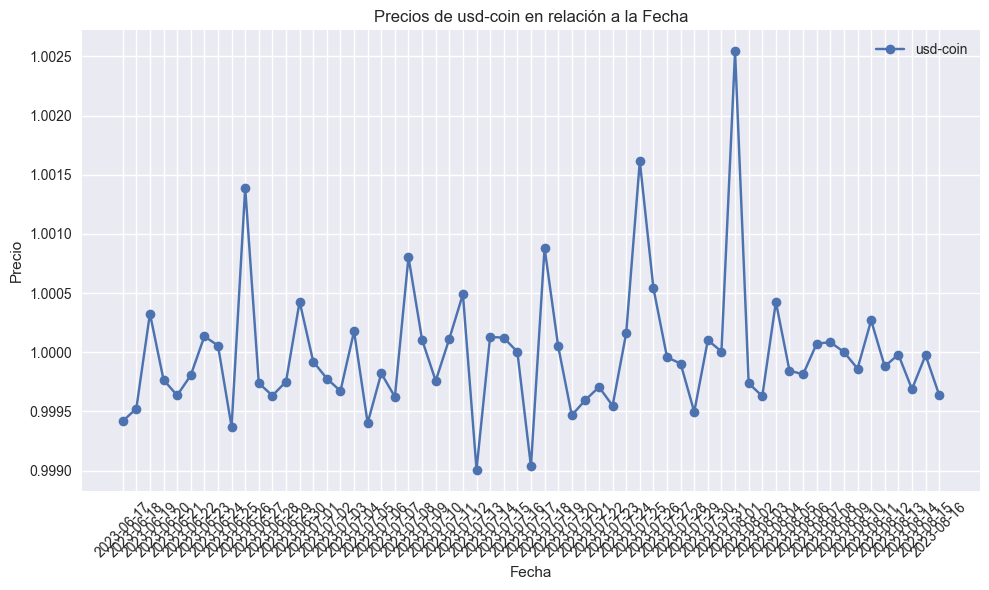

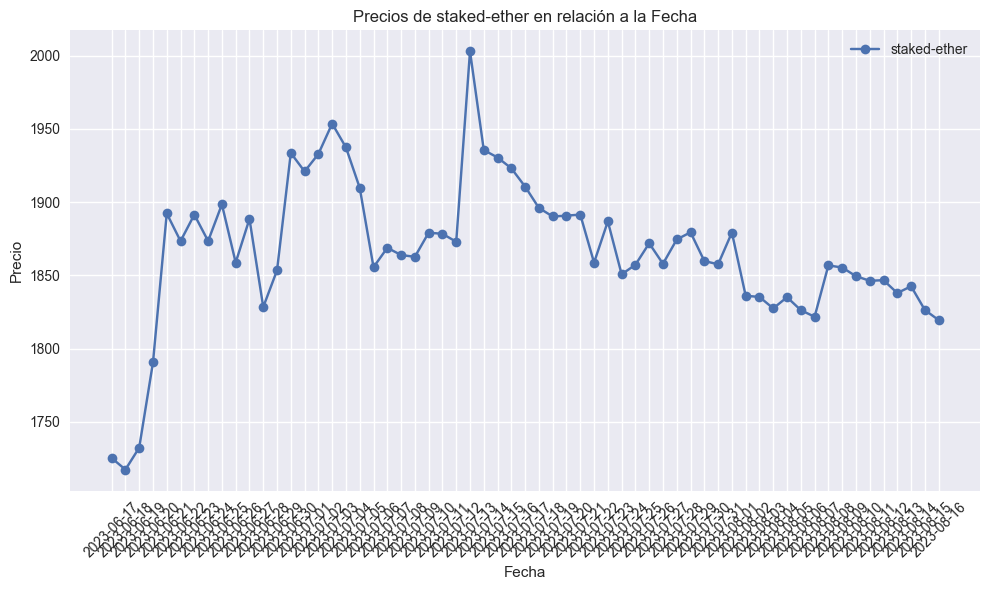

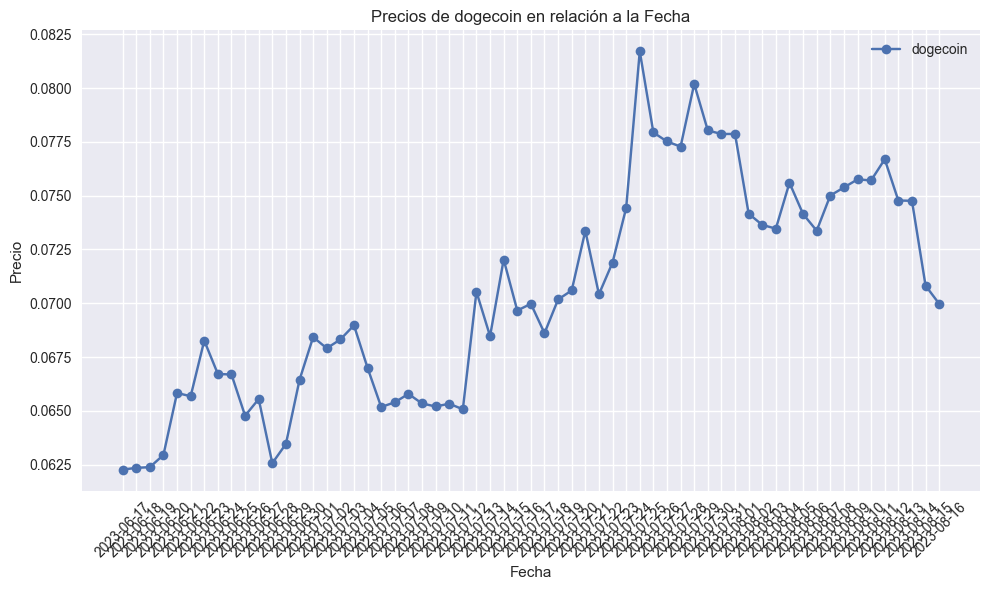

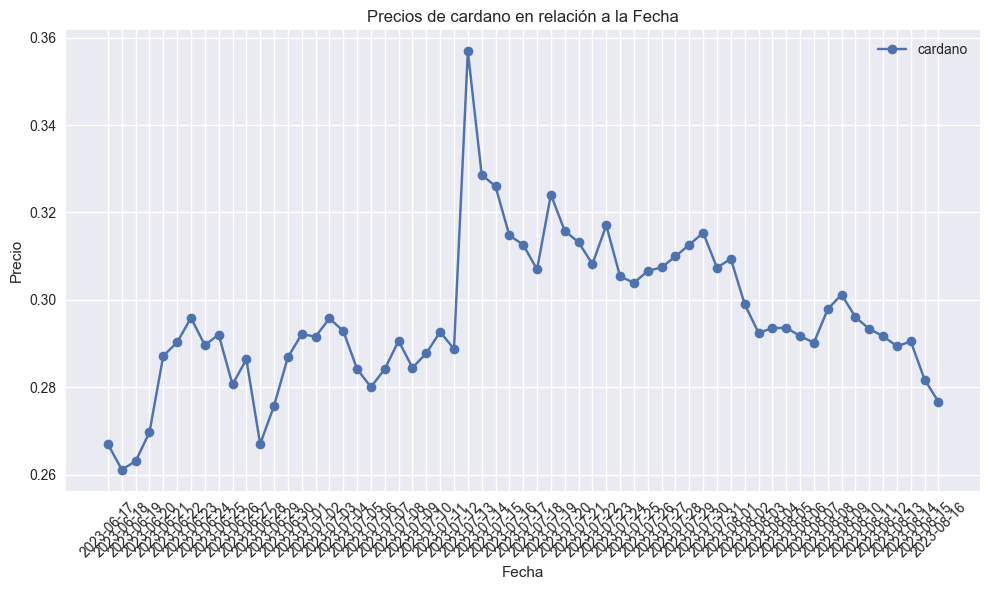

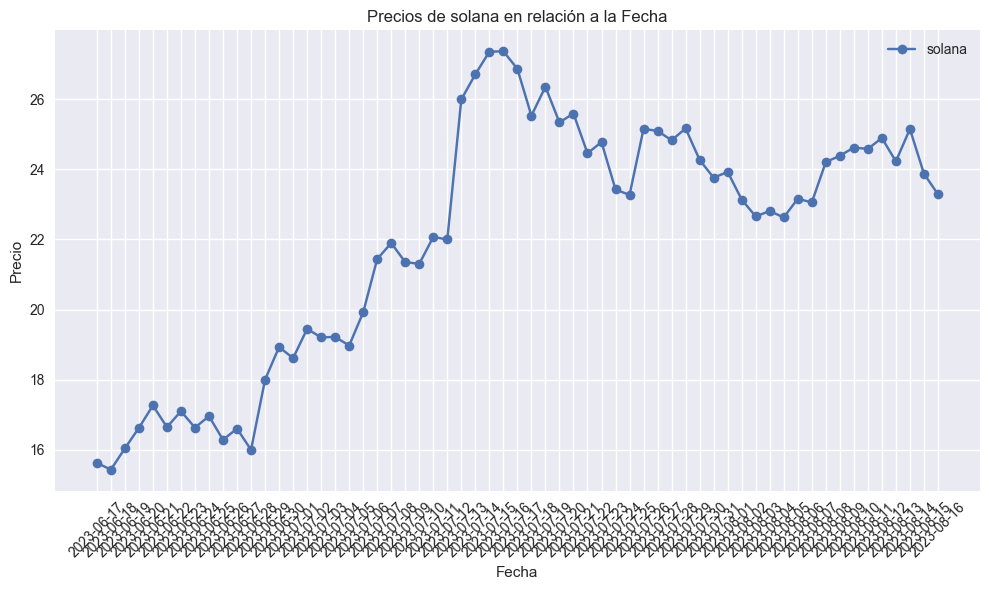

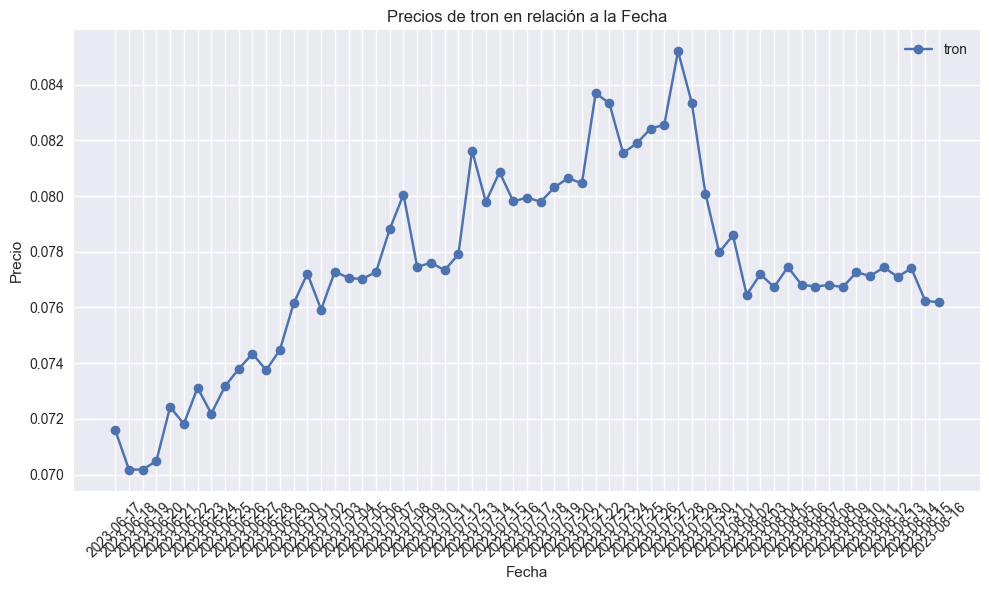

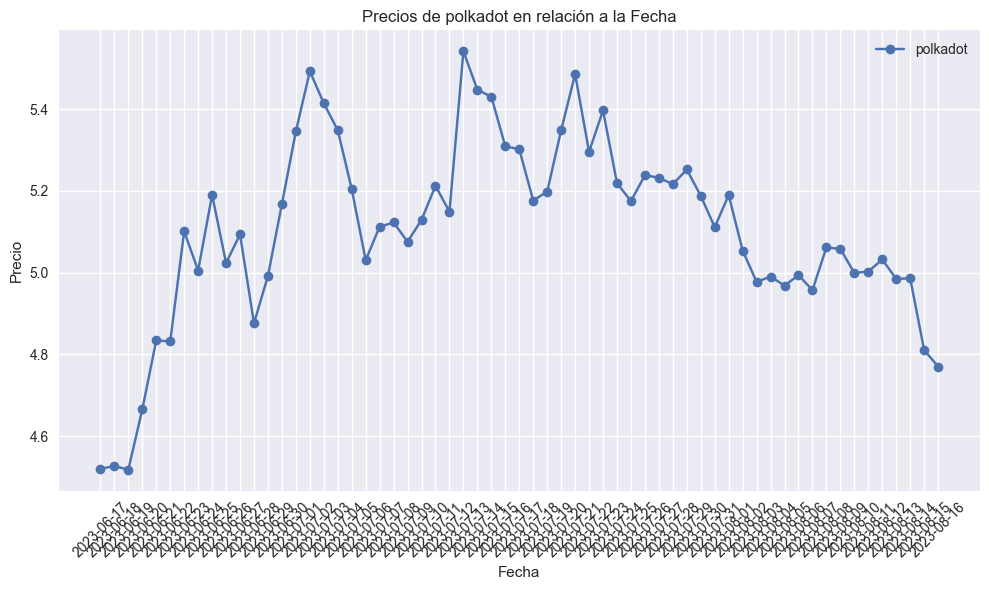

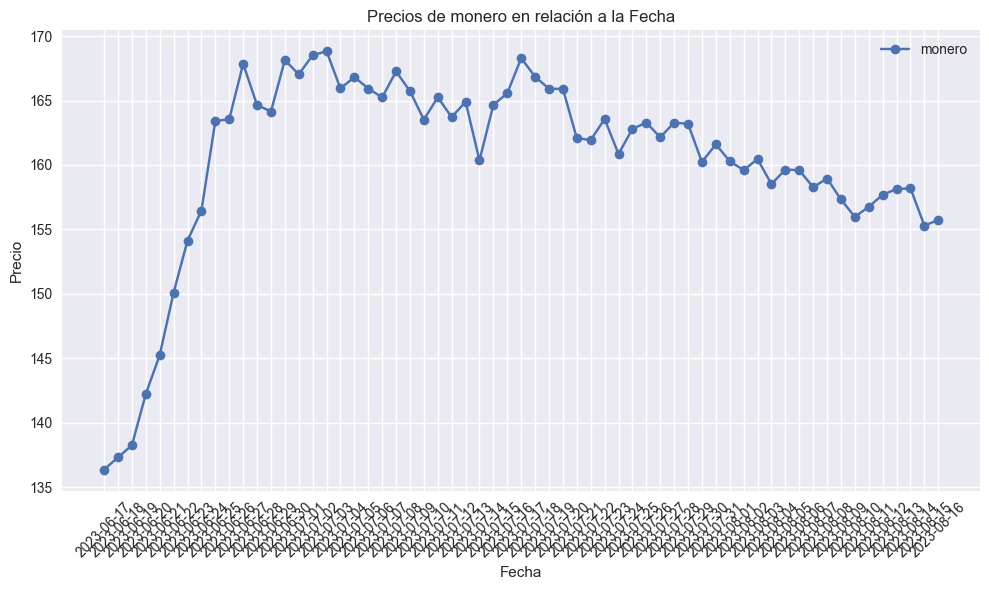

In [218]:
plt.style.use('seaborn')
for column in historico_precios_df.columns[1:]:
    plt.figure(figsize=(10, 6))
    plt.plot(historico_precios_df['fecha'], historico_precios_df[column], marker='o', label=column)
    plt.title(f'Precios de {column} en relación a la Fecha')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

Después de ver los gráficos podemos decir que si bien algúnas monedas tienen datos catalogados como ouliers, estos datos estan justificados por la volatividad de la moneda

 además, se debe tener en cuenta el valor de cada una, que que si bien el valor, por ejemplo el usd coin tiene una línea mas ruidosa, por así decirlo, hay que tener en cuenta que tan solo mueve unos pocos centavos de dolar y se mantiene en un mismo margen de operación constante

Ahora, solamente queremos quedarnos con 3 valores después de la coma, asíque realizamos el siguiente código

In [219]:
historico_precios_df.iloc[:, 1:] = historico_precios_df.iloc[:, 1:].apply(lambda x: ["{:.3f}".format(float(i)) for i in x])
historico_precios_df.head()

,fecha,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,dogecoin,cardano,solana,tron,polkadot,monero
0,2023-06-17,26501.044,1726.373,0.999,244.427,0.481,0.999,1725.300,0.062,0.267,15.626,0.072,4.520,136.351
1,2023-06-18,26333.093,1719.273,1.000,244.003,0.489,1.000,1717.346,0.062,0.261,15.434,0.070,4.526,137.307
2,2023-06-19,26779.387,1734.793,1.000,242.741,0.494,1.000,1732.312,0.062,0.263,16.039,0.070,4.518,138.241
3,2023-06-20,28330.891,1790.190,0.999,247.323,0.492,1.000,1790.503,0.063,0.270,16.625,0.070,4.665,142.228
4,2023-06-21,30101.765,1892.900,1.001,249.358,0.501,1.000,1892.281,0.066,0.287,17.263,0.072,4.834,145.245


Una vex teniendo todos los datos listos, se los pasa a un archivo .csv, para poder pasarlo a un dasboard

In [220]:
historico_precios_df.to_csv('historico_precios.csv', index = False)

Pero esto no es todo, ya que también considero importante la inversión pequeña y a corto plazo en monedas emergentes. Para ese descargamos 3 de las últimas monedas en salir al mercado, estas son Onchain AI, Sei y Pepe Of Yellow

In [253]:
data_onchain_ai = historial_criptomoneda('onchain-ai', 'usd', 'max', 'prices')
total_dates_onchain_ai = data_onchain_ai.shape[0]
data_onchain_ai['fecha'] = pd.date_range(end = pd.Timestamp.today(), periods = total_dates_onchain_ai, freq = 'D')
data_onchain_ai['fecha'] = data_onchain_ai['fecha'].dt.strftime('%Y-%m-%d')
data_onchain_ai.head()

,onchain-ai,fecha
0,0.013561,2023-08-07
1,0.013561,2023-08-08
2,0.015382,2023-08-09
3,0.010938,2023-08-10
4,0.009876,2023-08-11


In [252]:
data_sei = historial_criptomoneda('sei-network', 'usd', 'max', 'prices')
total_dates_sei = data_sei.shape[0]
data_sei['fecha'] = pd.date_range(end = pd.Timestamp.today(), periods = total_dates_sei, freq = 'D')
data_sei['fecha'] = data_sei['fecha'].dt.strftime('%Y-%m-%d')
data_sei.head()

,sei-network,fecha
0,0.175553,2023-08-15
1,0.265784,2023-08-16


In [234]:
data_pepe = historial_criptomoneda('pepe-of-yellow', 'usd', 'max', 'prices')
total_dates_pepe = data_pepe.shape[0]
data_pepe['fecha'] = pd.date_range(end = pd.Timestamp.today(), periods = total_dates_pepe, freq = 'D')
data_pepe['fecha'] = data_pepe['fecha'].dt.strftime('%Y-%m-%d')
data_pepe.head()

,pepe-of-yellow,fecha
0,5.985241e-10,2023-08-10
1,5.985241e-10,2023-08-11
2,4.764047e-10,2023-08-12
3,5.462889e-10,2023-08-13
4,3.423717e-10,2023-08-14


Procedemos a realizar graficos de su valor para tener conocimiento de sus tendencias

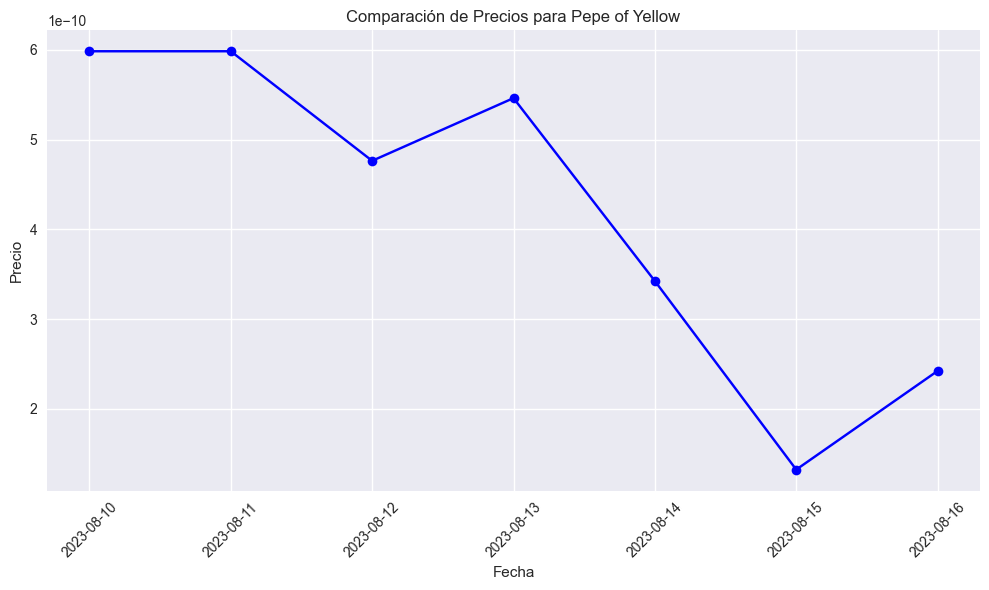

In [240]:
fechas = data_pepe['fecha']
precios = data_pepe['pepe-of-yellow']

plt.figure(figsize=(10, 6))
plt.plot(fechas, precios, marker='o', linestyle='-', color='b')
plt.title('Comparación de Precios para Pepe of Yellow')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

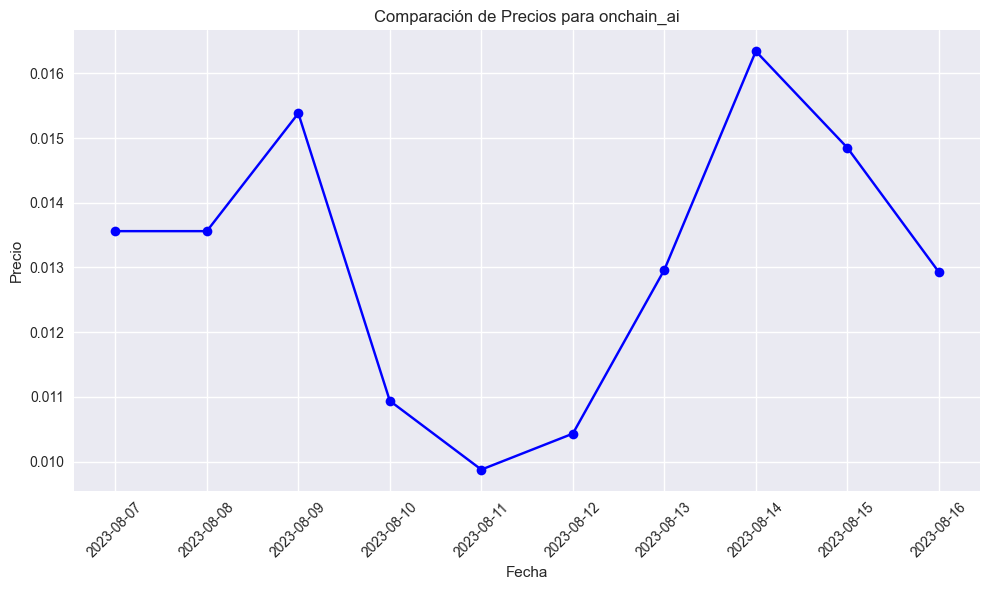

In [255]:
fechas = data_onchain_ai['fecha']
precios = data_onchain_ai['onchain-ai']

plt.figure(figsize=(10, 6))
plt.plot(fechas, precios, marker='o', linestyle='-', color='b')
plt.title('Comparación de Precios para onchain_ai')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

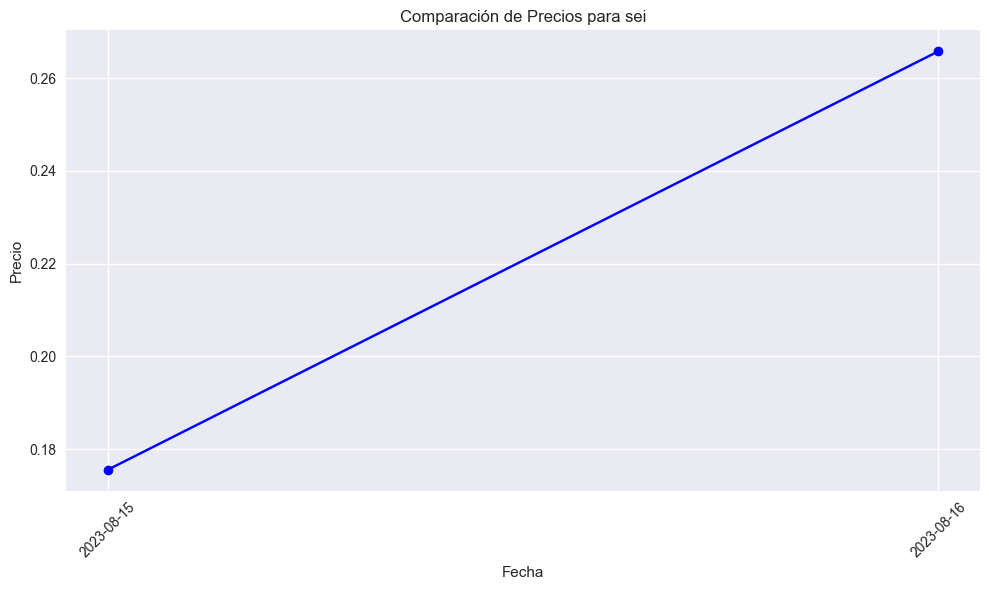

In [256]:
fechas = data_sei['fecha']
precios = data_sei['sei-network']

plt.figure(figsize=(10, 6))
plt.plot(fechas, precios, marker='o', linestyle='-', color='b')
plt.title('Comparación de Precios para sei')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

Y por último, elegimos la moneda que nos parece más conveniente, le reducimos la cantidad de decimales para un buen acople en Power BI, y ya estaría listo el EDA

In [248]:
data_sei['sei-network'] = data_sei['sei-network'].apply(lambda x: f"{x:.5f}")
data_sei

,sei-network,fecha
0,0.17555,2023-08-15
1,0.26578,2023-08-16


In [249]:
data_sei.to_csv('sei.csv', index = False)